In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**DATA COLLECTION AND PROCESSING**

In [2]:
# Loading the dataset to pandas DataFrame
df = pd.read_csv('./dataset/train_data.csv')

In [3]:
# Showing the first 5 rows of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Number of rows and columns in the dataset
df.shape

(614, 13)

In [5]:
# Statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Number or missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#  Removing the loan id column from the data
df.drop(['Loan_ID'], axis=1, inplace=True)

#  Replacing the 3+ values for dependents with 3
df = df.replace(to_replace='3+', value=3)

In [8]:
# Dealing with null values #

cols_mode = df[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']]
for i in cols_mode:
    df[i].fillna(df[i].mode().iloc[0], inplace=True)

cols_mean = df[['LoanAmount', 'Loan_Amount_Term']]
for i in cols_mean:
    df[i].fillna(df[i].mean(axis=0), inplace=True)

In [9]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**DATA VISUALIZATION**

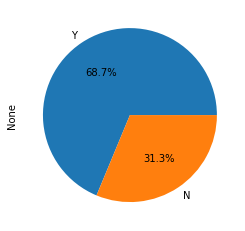

In [10]:
# Percentage of total loans approved and rejected

def pie_chart(col):
    approved = df[df["Loan_Status"] == "Y"][col].value_counts()
    rejected = df[df["Loan_Status"] == "N"][col].value_counts()

    df1 = pd.DataFrame([approved, rejected])
    df1.index = ["Approved", "Rejected"]
    df1.sum().plot(kind="pie", autopct='%1.1f%%')

pie_chart('Loan_Status')

In [12]:
def bar_chart(col):
    approved = df[df["Loan_Status"]=="Y"][col].value_counts()
    rejected = df[df["Loan_Status"]=="N"][col].value_counts()

    df1 = pd.DataFrame([approved, rejected])
    df1.index = ["Approved", "Rejected"]
    df1.plot(kind="bar")

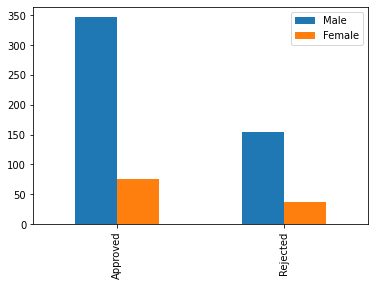

In [13]:
# Bar chart that shows approval and rejections between male and female applicants
bar_chart('Gender')

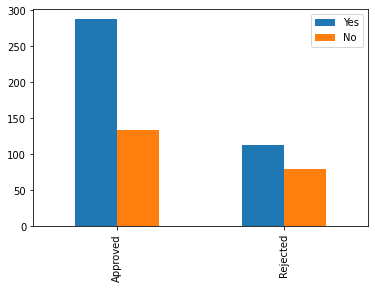

In [14]:
# This chart shows that married applicants were more likely to be approved for their loans
bar_chart('Married')

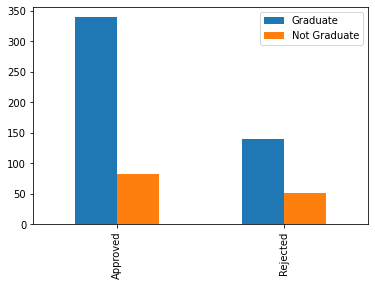

In [15]:
# Graduates are more likely to be approved for loans compared to non-graduates
bar_chart('Education')

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

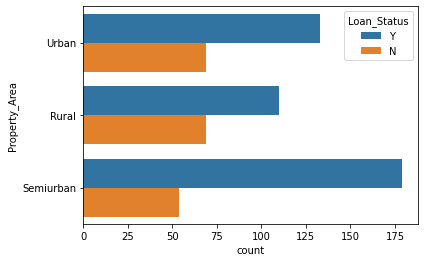

In [16]:
# This chart shows loan approvals and rejections based on property areas
sns.countplot(y='Property_Area', hue='Loan_Status', data=df)

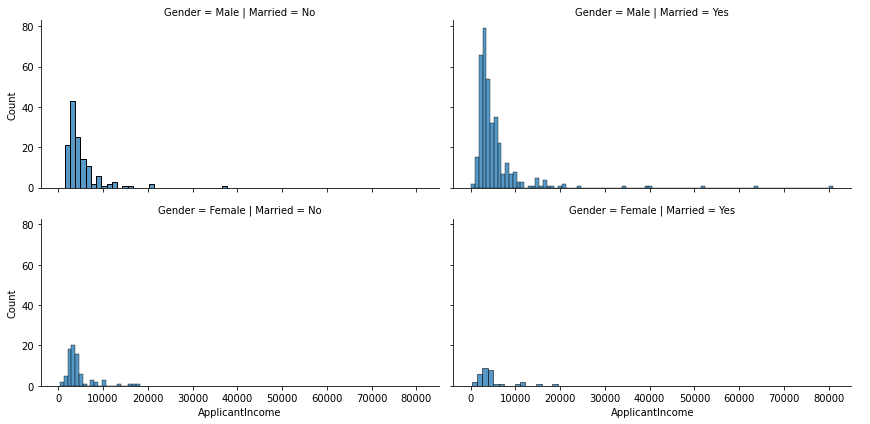

In [17]:
# The visualization below shows that male applicants generally have higher incomes.
# Also, males that are married hae greater income than that of unmarried males.

grid = sns.FacetGrid(df, row='Gender', col='Married', height=3, aspect=2)
grid.map(sns.histplot, 'ApplicantIncome')
grid.add_legend()

Text(0.5, 0.98, '')

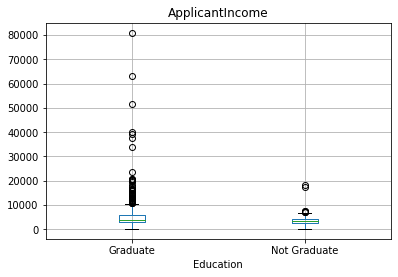

In [18]:
# Below shows that graduates tend to have higher incomes than non-graduates
df.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle('')

**TRAINING THE MODEL**

In [19]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df[["Gender", 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']] = ord_enc.fit_transform(
    df[["Gender", 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [20]:
df[["Gender", 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']] = df[
    ["Gender", 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']].astype('int')

In [21]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [22]:
from sklearn.model_selection import train_test_split
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(491, 11)
(491,)
(123, 11)
(123,)


In [23]:
from sklearn.metrics import f1_score

def loss(y_true, y_pred):
    f1 = f1_score(y_true, y_pred)

    print('Test Score Accuracy: {:.5f}'.format(f1))

In [24]:
#  Using Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(X_train, y_train)
    best_model = rand_clf.best_estimator_

    # Extract best score
    best_score = rand_clf.best_score_

    # Print best score
    print("Training Score: {:.3f}".format(best_score))

    # Predict test set labels
    y_pred = best_model.predict(X_test)

    # Compute accuracy
    accuracy = f1_score(y_test, y_pred)

    # Print accuracy
    print('Test Score Accuracy: {:.5f}'.format(accuracy))

    return best_model

In [25]:
randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         }, clf=DecisionTreeClassifier(random_state=2))

Training Score: 0.821
Test Score Accuracy: 0.85417


DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=0.8,
                       max_leaf_nodes=45, min_samples_leaf=0.04,
                       min_samples_split=10, min_weight_fraction_leaf=0.05,
                       random_state=2)

In [26]:
ds = DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random')
ds.fit(X_train.values, y_train)
pred4 =ds.predict(X_test.values)
loss(y_test, pred4)

Test Score Accuracy: 0.85417


In [27]:
import joblib

joblib.dump(ds, "model.pkl")
model = joblib.load('model.pkl')
model.predict(X_test)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])